<a href="https://colab.research.google.com/github/aakersh18/book/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url= "https://raw.githubusercontent.com/aakersh18/book/refs/heads/main/exercise_data.csv"
data = pd.read_csv(url)
import matplotlib.pyplot as plt
import seaborn as sns
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


In [ ]:
#To read the last 5 rows
data.tail(10)

,Duration,Date,Pulse,Maxpulse,Calories
22,45,NaN,100,119,282.0
23,60,23-12-2020,130,101,300.0
24,45,24-12-2020',105,132,246.0
25,60,25-12-2020,102,126,334.5
26,60,26-12-2020,100,120,250.0
27,60,27-12-2020,92,118,241.0
28,60,28-12-2020,103,132,NaN
29,60,29-12-2020,100,132,280.0
30,60,30-12-2020,102,129,380.3
31,60,31-12-2020,92,115,243.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [ ]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


misssing values analysis


In [ ]:
data.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


to get the percentage of null values in each column


In [ ]:
(data.isnull().sum()/(len(data)))*100

,0
Duration,0.000
Date,3.125
Pulse,0.000
Maxpulse,0.000
Calories,6.250


In [ ]:
data.shape

(32, 5)

Data reduction

In [ ]:
#removing the pulse column
data = data.drop(['Pulse'], axis=1)

In [ ]:
data.head()

,Duration,Date,Maxpulse,Calories
0,60,01-12-2020,130,409.1
1,60,02-12-2020,145,479.0
2,60,03-12-2020,135,340.0
3,45,04-12-2020,175,282.4
4,45,05-12-2020,148,406.0


In [ ]:
from datetime import datetime
current_time = datetime.now()
print(current_time)
print("current_time.minute", current_time.strftime("%h,%m,%S"))

2025-01-30 01:22:58.157168
current_time.minute Jan,01,58


In [ ]:
print(data.columns)


Index(['Duration', 'Date', 'Maxpulse', 'Calories'], dtype='object')


In [ ]:
data['DifferenceOfPulse'] = data['Maxpulse'] - data['Pulse']
data.head()


,Duration,Date,Pulse,Maxpulse,Calories,DifferenceOfPulse
0,60,01-12-2020,110,130,409.1,20
1,60,02-12-2020,117,145,479.0,28
2,60,03-12-2020,103,135,340.0,32
3,45,04-12-2020,109,175,282.4,66
4,45,05-12-2020,117,148,406.0,31


In [ ]:
data['Calories'] = data['Calories'].fillna(data['Calories'].mean())
print("Mean of Maxpulse is:", data['Maxpulse'].mean())
print("Median of Maxpulse is:", data['Maxpulse'].median())
print("Mode of Maxpulse is:", data['Maxpulse'].mode()[0])

Mean of Maxpulse is: 128.5
Median of Maxpulse is: 127.5
Mode of Maxpulse is: 120


In [ ]:
data.isnull().sum()

,0
Duration,0
Date,1
Maxpulse,0
Calories,0


In [ ]:
data_cleaned = data.dropna()
data_cleaned.isnull().sum()

,0
Duration,0
Date,0
Maxpulse,0
Calories,0


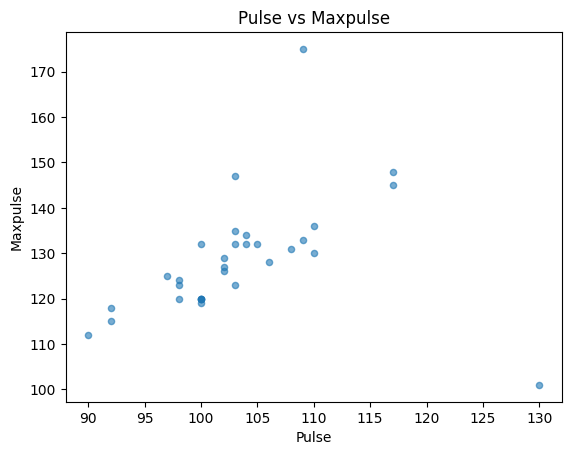

In [ ]:
data.plot(kind='scatter', x='Pulse', y='Maxpulse', alpha=0.6)
plt.title('Pulse vs Maxpulse')
plt.show()

In [ ]:
data.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0


In [ ]:
numerical_data = data.drop(columns=['Date'])
numerical_data.head()

# Generate the correlation matrix
correlation_matrix = numerical_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          Duration     Pulse  Maxpulse  Calories
Duration  1.000000  0.004410  0.049959 -0.114169
Pulse     0.004410  1.000000  0.276583  0.513186
Maxpulse  0.049959  0.276583  1.000000  0.357460
Calories -0.114169  0.513186  0.357460  1.000000


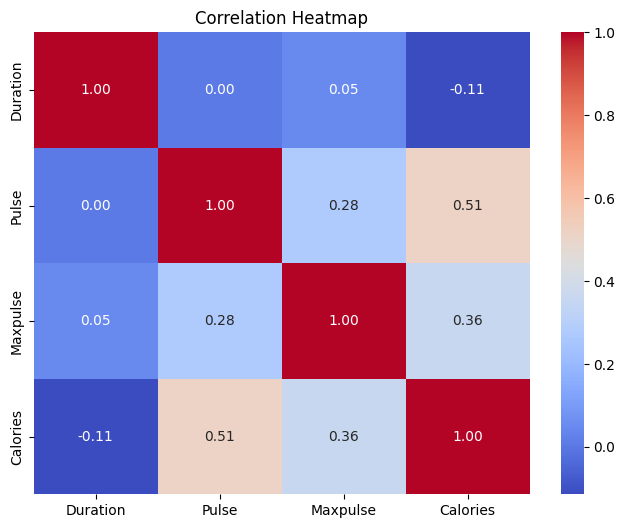

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()